# Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
from sklearn import linear_model

# Our Data

In [2]:
df = pd.read_csv("E:/0- Master's Courses/1- Statistical Learning/3- Project/3- Code/1- Regression/Mashhad - One Day.csv")
df.head()

Date  T_min_1  T_average_1  T_max_1  H_min_1  H_average_1  H_max_1  \
0  1/1/2000      NaN          NaN      NaN      NaN          NaN      NaN   
1  1/2/2000      0.0          7.9     17.6     24.0       47.000     72.0   
2  1/3/2000     -0.6          8.7     20.0     21.0       41.625     71.0   
3  1/4/2000      1.6          9.7     20.4     17.0       34.625     52.0   
4  1/5/2000     -0.2         10.1     18.4     17.0       31.750     57.0   

   WS_1     Pm_1  sshn_1  Rain_1  response  
0   NaN      NaN     NaN     NaN       0.0  
1  1.75  1020.85     8.7     0.0       0.0  
2  1.25  1018.37     8.7     0.0       0.0  
3  2.00  1015.65     8.6     0.0       0.0  
4  1.75  1014.11     7.0     0.0       0.0

# 1- Preprocessing

## 1-1- Missing Data 

In [3]:
pd.DataFrame(df.isnull().sum())

0
Date         0
T_min_1      3
T_average_1  1
T_max_1      3
H_min_1      1
H_average_1  1
H_max_1      1
WS_1         1
Pm_1         1
sshn_1       5
Rain_1       1
response     0

In [4]:
df = df.fillna(method ='bfill')
df.head()

Date  T_min_1  T_average_1  T_max_1  H_min_1  H_average_1  H_max_1  \
0  1/1/2000      0.0          7.9     17.6     24.0       47.000     72.0   
1  1/2/2000      0.0          7.9     17.6     24.0       47.000     72.0   
2  1/3/2000     -0.6          8.7     20.0     21.0       41.625     71.0   
3  1/4/2000      1.6          9.7     20.4     17.0       34.625     52.0   
4  1/5/2000     -0.2         10.1     18.4     17.0       31.750     57.0   

   WS_1     Pm_1  sshn_1  Rain_1  response  
0  1.75  1020.85     8.7     0.0       0.0  
1  1.75  1020.85     8.7     0.0       0.0  
2  1.25  1018.37     8.7     0.0       0.0  
3  2.00  1015.65     8.6     0.0       0.0  
4  1.75  1014.11     7.0     0.0       0.0

## 1-2- Time series

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date  T_min_1  T_average_1  T_max_1  H_min_1  H_average_1  H_max_1  \
0 2000-01-01      0.0          7.9     17.6     24.0       47.000     72.0   
1 2000-01-02      0.0          7.9     17.6     24.0       47.000     72.0   
2 2000-01-03     -0.6          8.7     20.0     21.0       41.625     71.0   
3 2000-01-04      1.6          9.7     20.4     17.0       34.625     52.0   
4 2000-01-05     -0.2         10.1     18.4     17.0       31.750     57.0   

   WS_1     Pm_1  sshn_1  Rain_1  response  
0  1.75  1020.85     8.7     0.0       0.0  
1  1.75  1020.85     8.7     0.0       0.0  
2  1.25  1018.37     8.7     0.0       0.0  
3  2.00  1015.65     8.6     0.0       0.0  
4  1.75  1014.11     7.0     0.0       0.0

In [6]:
df.set_index('Date',inplace=True) 

# 2- Data description

<AxesSubplot:>

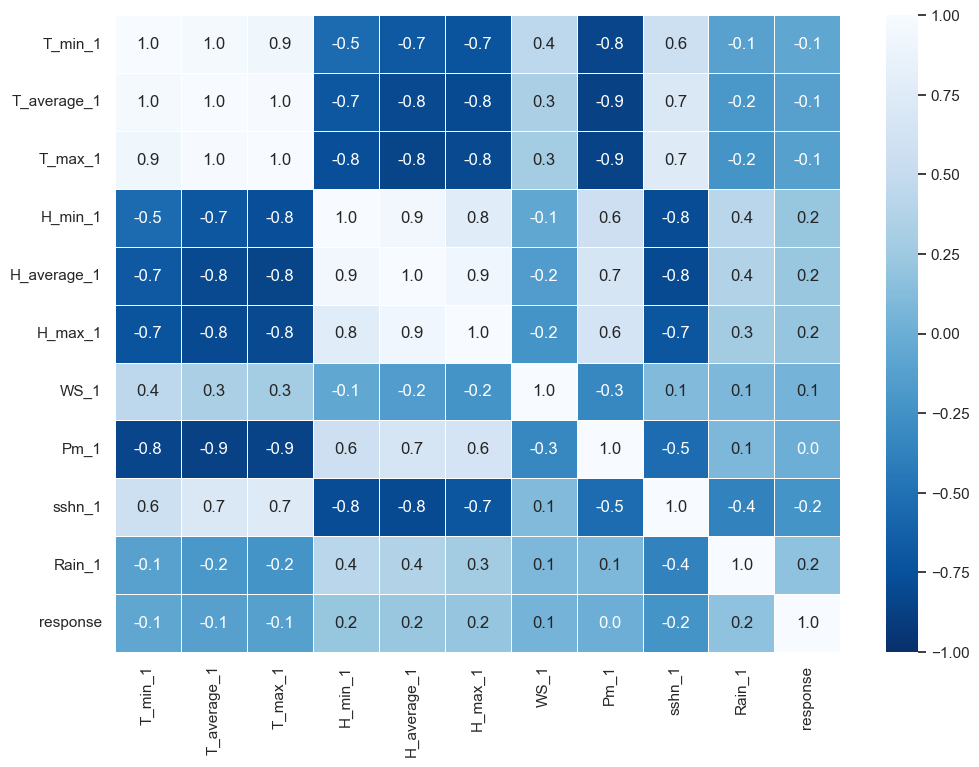

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), vmin=-1, vmax=1 ,  annot=True, fmt=".1f",linewidth=.5 , cmap = 'Blues_r')

In [8]:
print('==================== Range ====================')
data_range = df.max(numeric_only=True) - df.min(numeric_only=True)
print(data_range)
print('==================== Mode =====================')
data_mode = df.mode()
print(data_mode)
print('==================== Variance =================')
data_variance = df.var(numeric_only=True)
print(data_variance)
print('====================== Skwe ===================')
data_skwe = df.skew(numeric_only=True)
print(data_skwe)
print('======================= Kurt ==================')
data_kurt = df.kurt(numeric_only=True)
print(data_kurt)

==================== Range ====================
T_min_1        50.300
T_average_1    49.400
T_max_1        53.500
H_min_1        99.000
H_average_1    90.125
H_max_1        86.000
WS_1           10.000
Pm_1           51.457
sshn_1         14.000
Rain_1         47.200
response       47.200
dtype: float64
==================== Mode =====================
   T_min_1  T_average_1  T_max_1  H_min_1  H_average_1  H_max_1   WS_1  \
0     18.0         26.0     33.6     10.0         25.0    100.0  2.875   
1     19.0          NaN      NaN      NaN          NaN      NaN    NaN   
2      NaN          NaN      NaN      NaN          NaN      NaN    NaN   

      Pm_1  sshn_1  Rain_1  response  
0  1005.58     0.0     0.0       0.0  
1  1009.46     NaN     NaN       NaN  
2  1018.71     NaN     NaN       NaN  
==================== Variance =================
T_min_1         73.974319
T_average_1     97.020081
T_max_1        114.183116
H_min_1        424.111179
H_average_1    526.086235
H_max_1        6

# 3- Visualization

## 3-1- Histogram

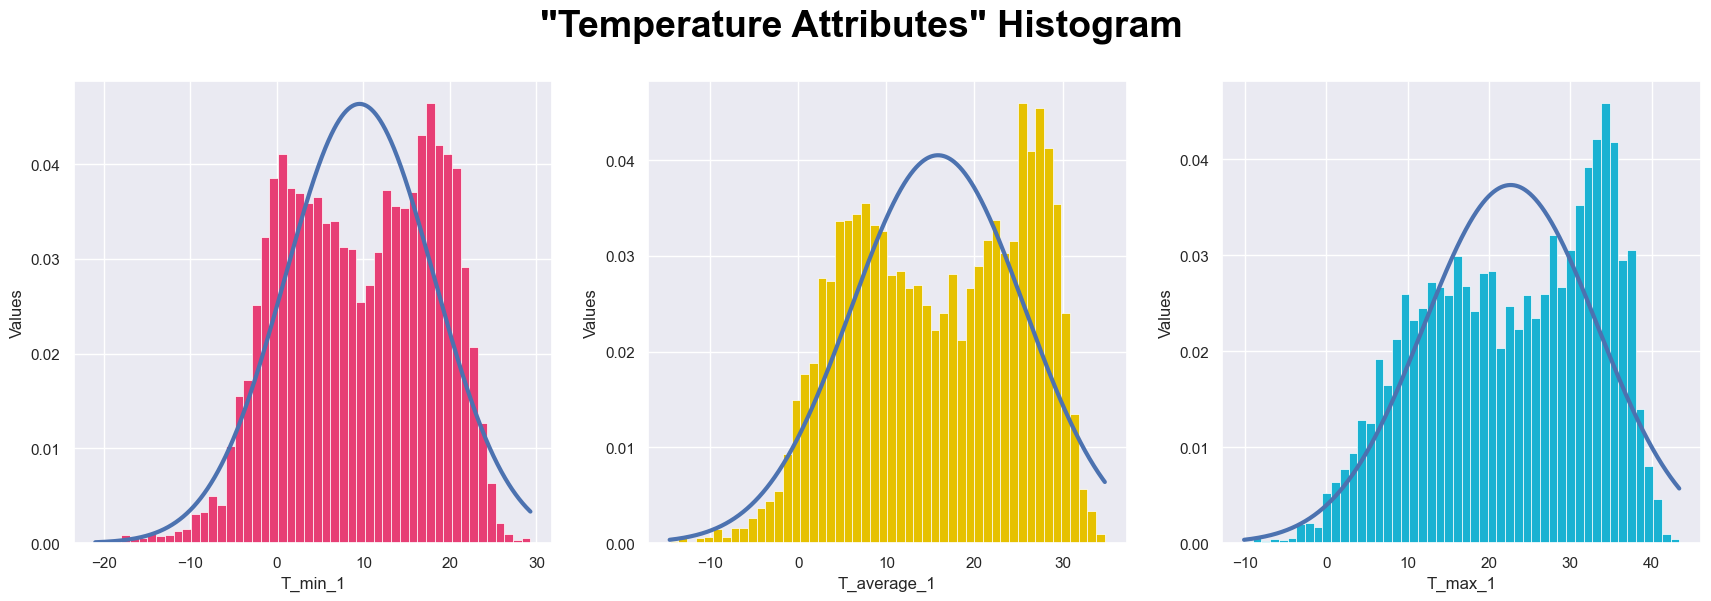

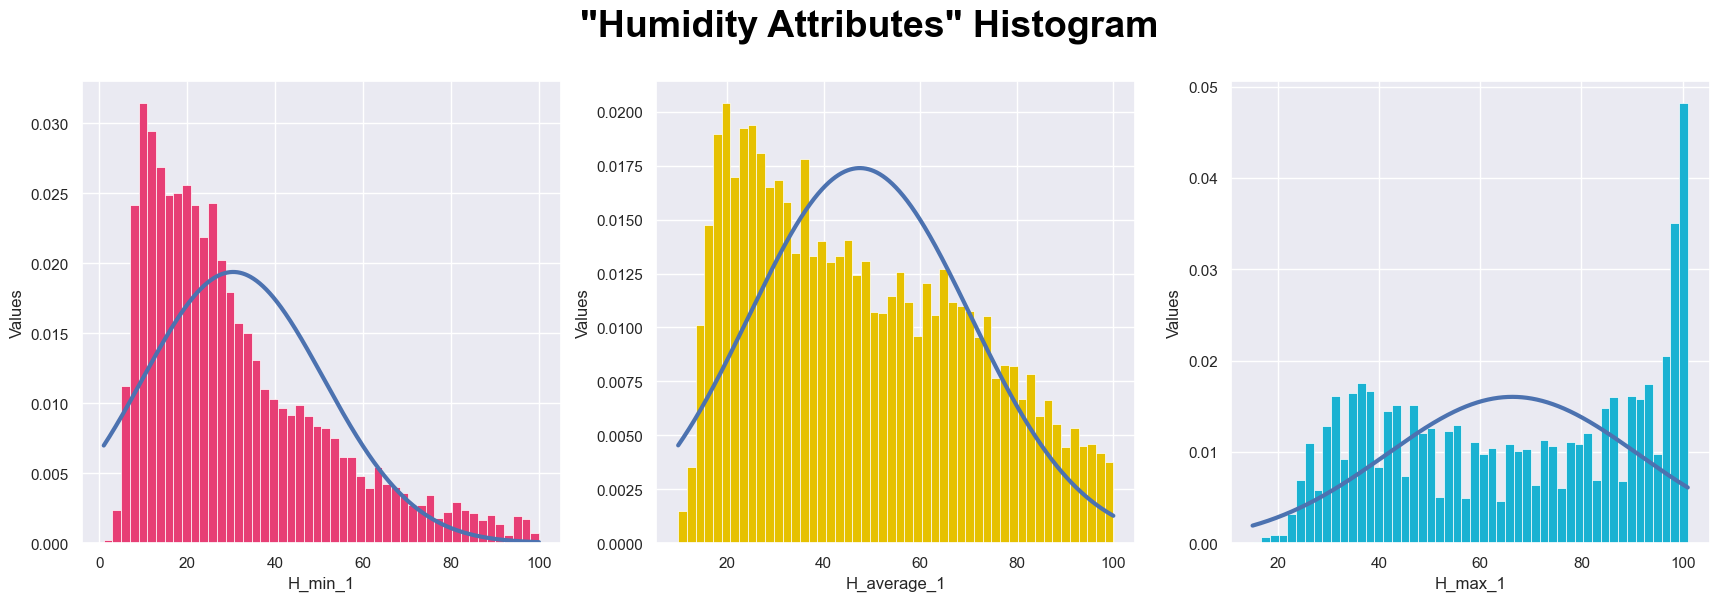

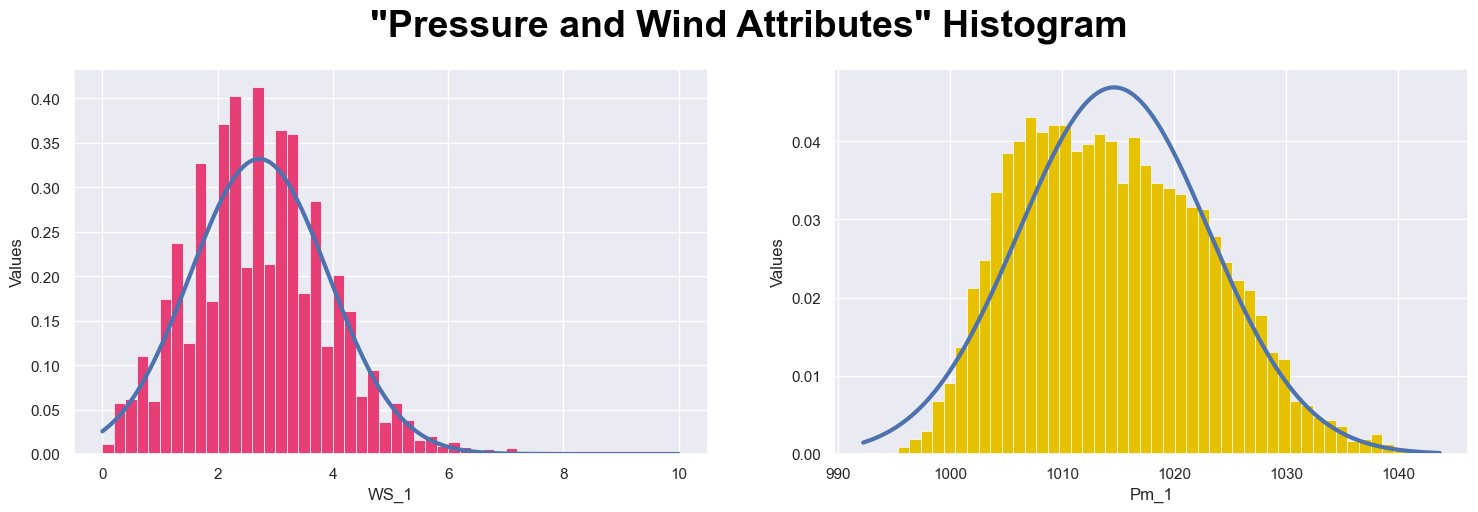

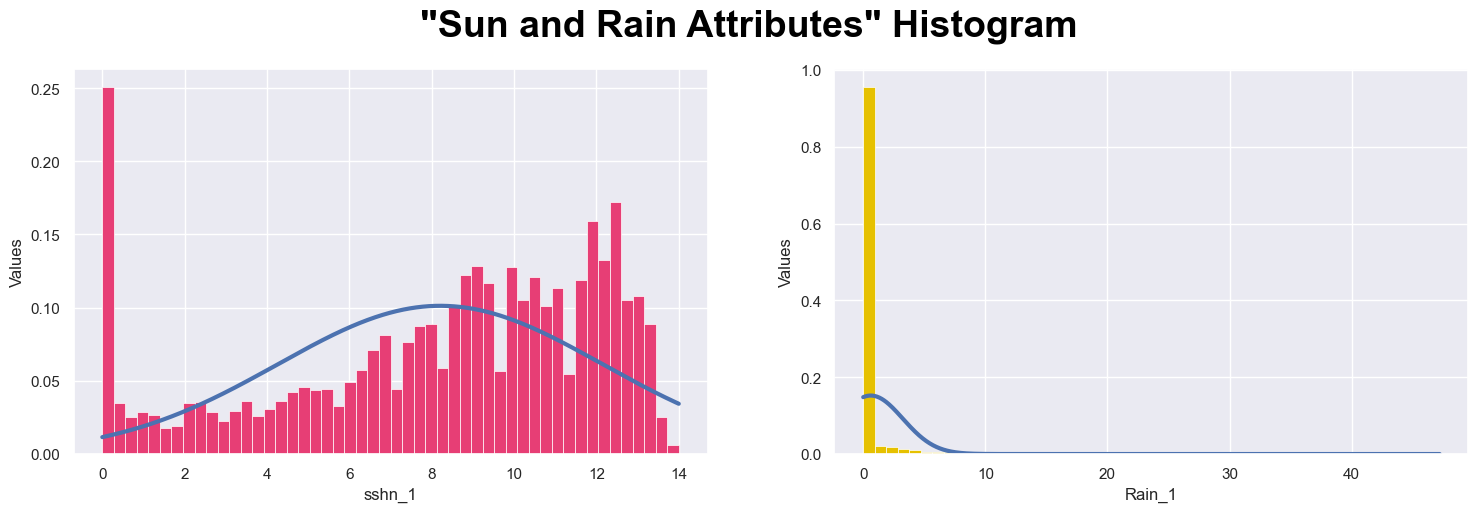

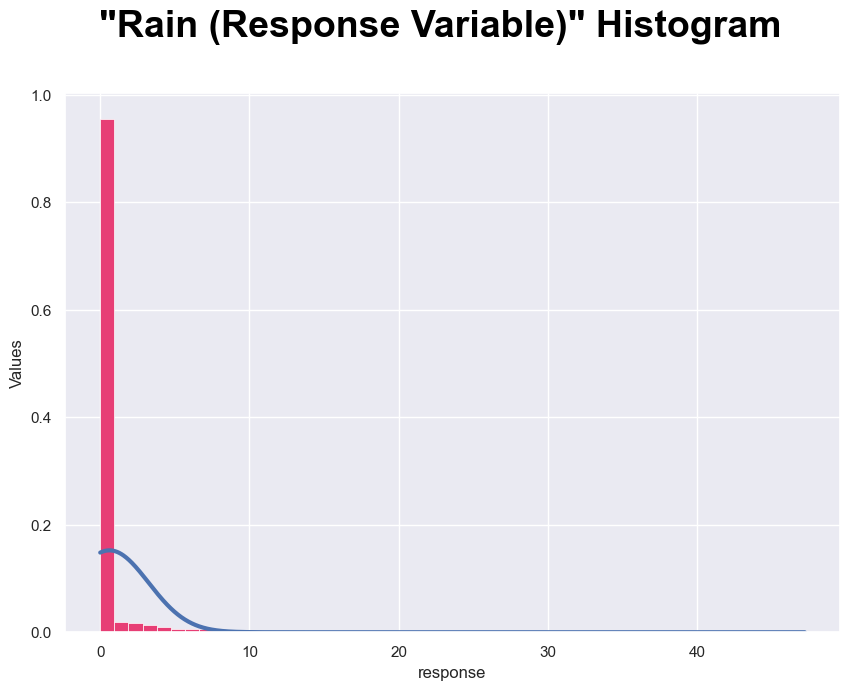

In [9]:
data_set_columns_histogram = [['T_min_1', 'T_average_1', 'T_max_1'],
                              ['H_min_1', 'H_average_1', 'H_max_1'],
                              ['WS_1', 'Pm_1'],
                              ['sshn_1', 'Rain_1'], ['response']
                              ]
colors = [
    '#e73e75',
    '#e6c100',
    '#1ab2d2',
]

title_list = ['Temperature Attributes',
              'Humidity Attributes', 'Pressure and Wind Attributes', 'Sun and Rain Attributes', 'Rain (Response Variable)']
sns.set()

i = 0
for i in range(0, 5):
    if i == 2 or i == 3:
        plt.figure(figsize=(18, 5))
    elif i == 4:
        plt.figure(figsize=(10, 7))
    else:
        plt.figure(figsize=(21, 6))

    histogram_title = '"' + title_list[i] + '"' + ' ' + 'Histogram'
    plt.suptitle(histogram_title, fontsize=27,
                 y=1, fontweight='bold', color='Black')
    n = 1
    for each in data_set_columns_histogram[i]:
        q = len(data_set_columns_histogram[i])
        plt.subplot(1, q, n)
        mu, std = norm.fit(df[each])
        plt.hist(df[each], bins=50,  facecolor=colors[n - 1],
                 edgecolor='white', density=True, linewidth=0.5)
        plt.xlabel(each)
        plt.ylabel('Values')
        xmin = df[each].min()
        xmax = df[each].max()
        x = np.linspace(xmin, xmax, 1000)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, linewidth=3, color='b')
        n = n + 1


## 3-2- Scatter Plots

<Figure size 1170x827 with 0 Axes>

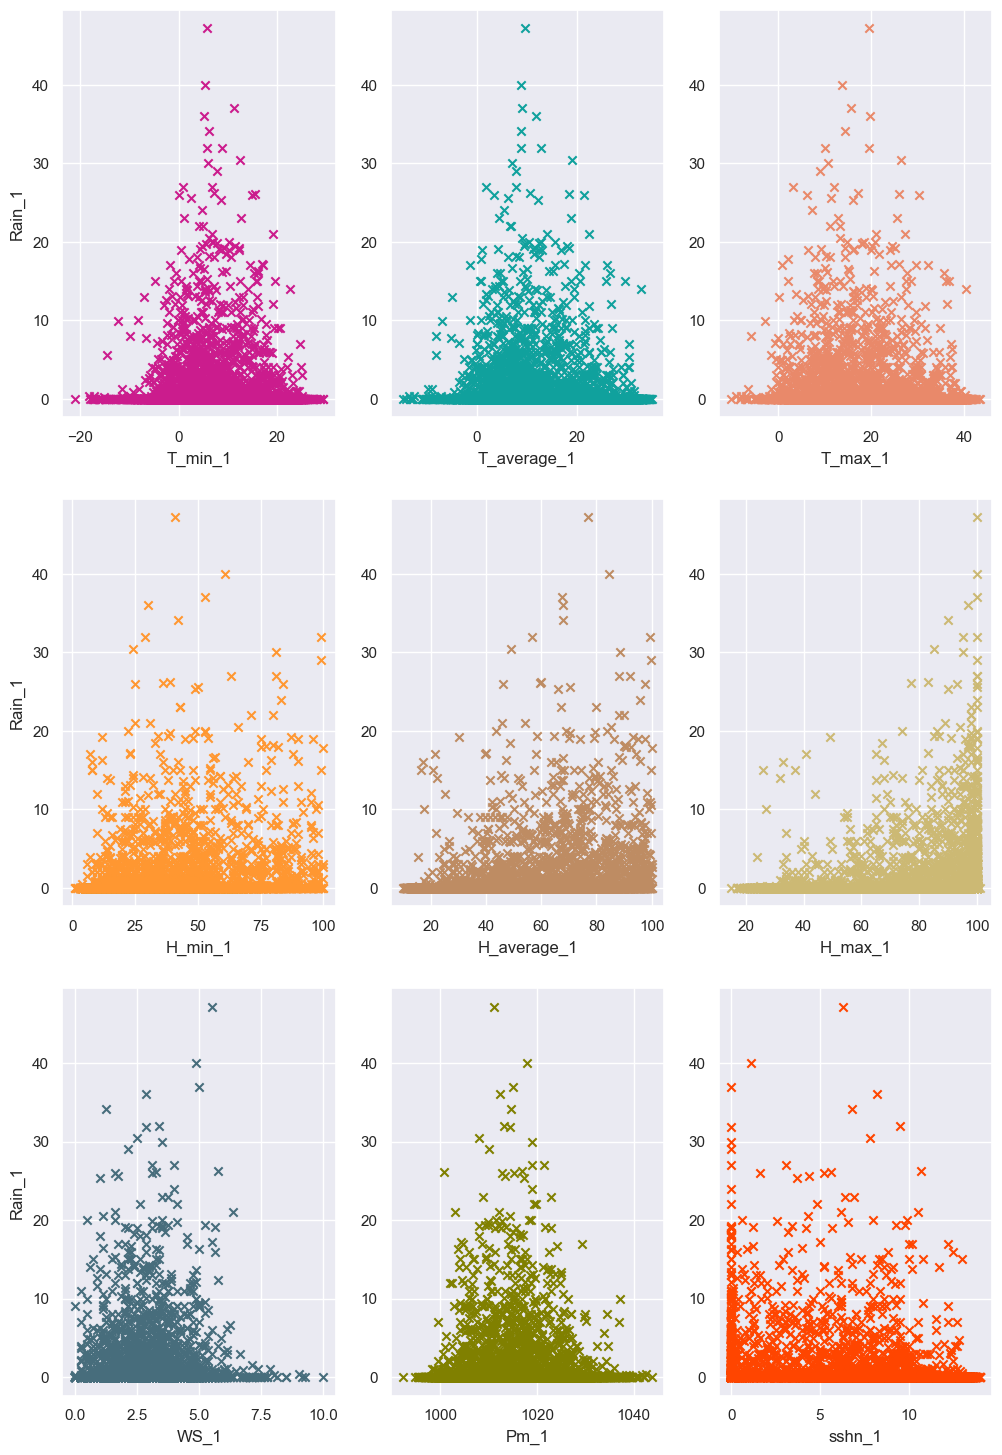

In [10]:
Columnsn_list = np.asanyarray(df.columns)
Color_list= ['#cb1c8d','#10a19d','#e9896a','#ff9731','#be8c63','y','#476d7c','olive','orangered','r']
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 3 , figsize = (12 , 18))
K = 0

for i in range (3):
    for j in range (3):
        axes[i][j].scatter( df.iloc[: , K] , df.response , marker = "x",color=Color_list[K])
        axes[i][j].set_xlabel( Columnsn_list[K] , labelpad = 5)
        axes[i][0].set_ylabel( Columnsn_list[9], labelpad = 5)
        K+=1

## 3-3- Box Plot

### 3-3-1- Box Plot for Temperature

Text(0.5, 0.95, '"Temperature Attributes" BoxPlot')

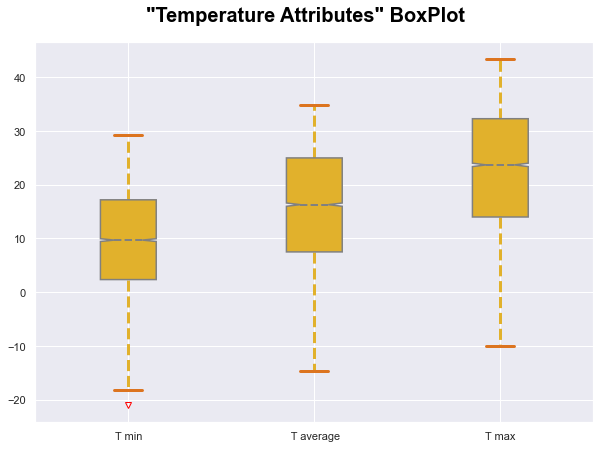

In [197]:
plt.rcParams["figure.figsize"] = [10, 7]
temperature = pd.DataFrame({
    "T minimum": df['T_min_1'],
    "T Average ": df['T_average_1'],
    "T maximum ": df['T_max_1'],
})
c = '#e1b12c'
sns.set()
temperature_box_plot = plt.boxplot(temperature,
                                   patch_artist=True,
                                   notch=True,
                                   boxprops=dict(
                                       facecolor=c, color='gray', linewidth=1.5),
                                   whiskerprops=dict(
                                       color=c, linestyle="--", linewidth=3),
                                   capprops=dict(color='#dc741f', linewidth=3),
                                   flierprops=dict(
                                       markeredgecolor='red', marker='v'),
                                   medianprops=dict(
                                       linestyle='--', linewidth=2, color='gray'),
                                   labels=[
                                       'T min', ' T average', 'T max'])
plt.suptitle('"Temperature Attributes" BoxPlot', fontsize=20,
             y=0.95, fontweight='bold', color='black')



### 3-3-2- Box Plot for Humidity


Text(0.5, 0.95, 'Humidity Attributes BoxPlot')

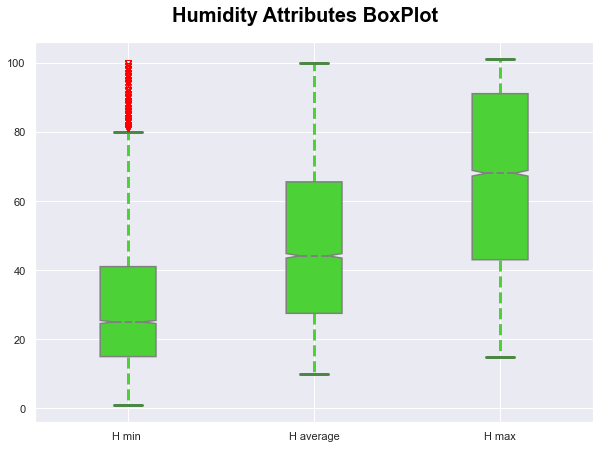

In [198]:
plt.rcParams["figure.figsize"] = [10, 7]
humidity = pd.DataFrame({
    "H min": df['H_min_1'],
    "H Average ": df['H_average_1'],
    "H max ": df['H_max_1'],
})
d = '#4cd137'
humidity_box_plot = plt.boxplot(humidity,
                                patch_artist=True,
                                notch=True,
                                boxprops=dict(
                                    facecolor=d, color='gray', linewidth=1.5),
                                whiskerprops=dict(
                                    color=d, linestyle="--", linewidth=3),
                                capprops=dict(color='#4D8745', linewidth=3),
                                flierprops=dict(
                                    markeredgecolor='red', marker='v'),
                                medianprops=dict(
                                    linestyle='--', linewidth=2, color='gray'),
                                labels=[
                                    'H min ', 'H average', 'H max'])
plt.suptitle('Humidity Attributes BoxPlot', fontsize=20,
             y=0.95, fontweight='bold', color='black')



### 3-3-3- Box Plot for Other Attributes


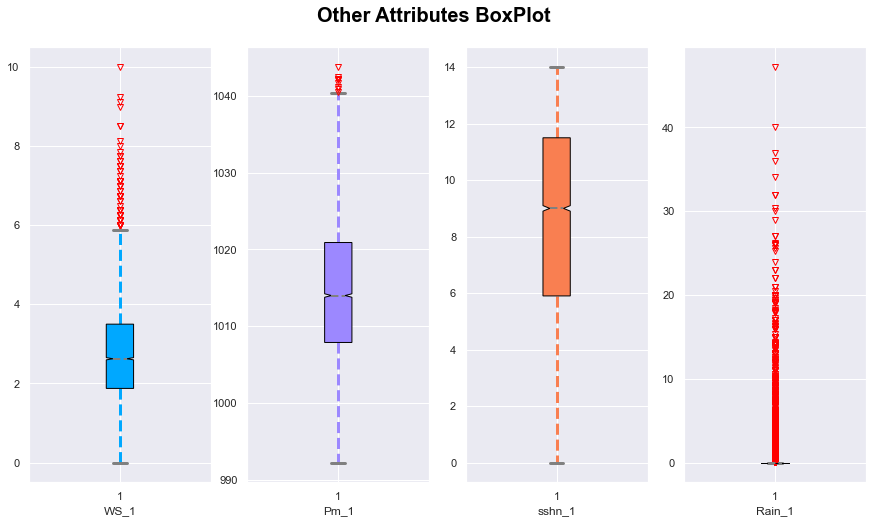

In [199]:
j = 1
data_set_columns_boxplot = [ 'WS_1' , 'Pm_1' , 'sshn_1', 'Rain_1' ]
colors = ['#00a8ff', '#9c88ff' , '#F97F51', '#B33771']
plt.figure(figsize=(15, 8))
plt.suptitle('Other Attributes BoxPlot', fontsize=20,
             y=0.95, fontweight='bold', color='black')
for each in data_set_columns_boxplot:
    plt.subplot(1, 4, j)
    plt.boxplot(df[each],
                patch_artist=True,
                notch=True,
                boxprops=dict(facecolor=colors[j-1]),
                whiskerprops=dict(
        color=colors[j-1], linestyle="--", linewidth=3),
        capprops=dict(color='gray', linewidth=3),
        flierprops=dict(
        markeredgecolor='red', marker='v'),
        medianprops=dict(
        linestyle='--', linewidth=2, color='gray'))
    plt.xlabel(each)
    j = j + 1


## 3-4- Pie chart for response

(-1.1121606493907084,
 1.2645679826720042,
 -1.107496849414223,
 1.2038706771524397)

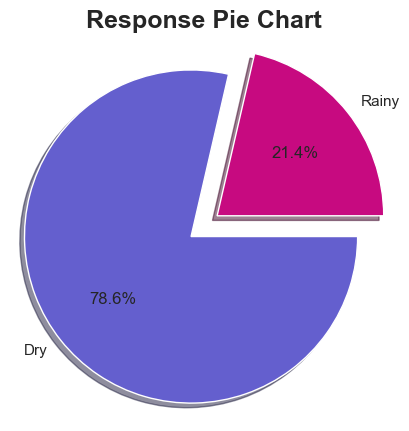

In [56]:
data_set_for_pie_chart = df.copy()
data_set1 = np.array(data_set_for_pie_chart)

for i in range(len(data_set_for_pie_chart)):
    if data_set1[i][10] > 0:
        data_set1[i][10] = 1
    else:
        data_set1[i][10] = 0
    data_set_for_pie_chart = pd.DataFrame(data_set1, columns=['T_min_1', 'T_average_1', 'T_max_1', 'H_min_1', 'H_average_1',
       'H_max_1', 'WS_1', 'Pm_1', 'sshn_1', 'Rain_1', 'response'])


colors = [
    '#C70A80', '#645FCE']

def func(pct):
    return "{:1.1f}%".format(pct)


direction_list = [1 ,0]
list_for_counter = []

for p in range(len(direction_list)):
    list_for_counter.append(data_set_for_pie_chart['response'][data_set_for_pie_chart['response'] == direction_list[p]].count())
plt.figure(figsize=(5 , 5))    
plt.pie(list_for_counter, labels=['Rainy' , 'Dry'], autopct=lambda pct: func(pct), explode=[0.2, 0], shadow=True, colors=colors)
plt.title('Response Pie Chart', fontsize=18, fontweight='bold')
plt.axis('equal')

## 3-5-Pair plot

Text(-5, 11.8, 'Scatter Matrix for Numerical Variables ')

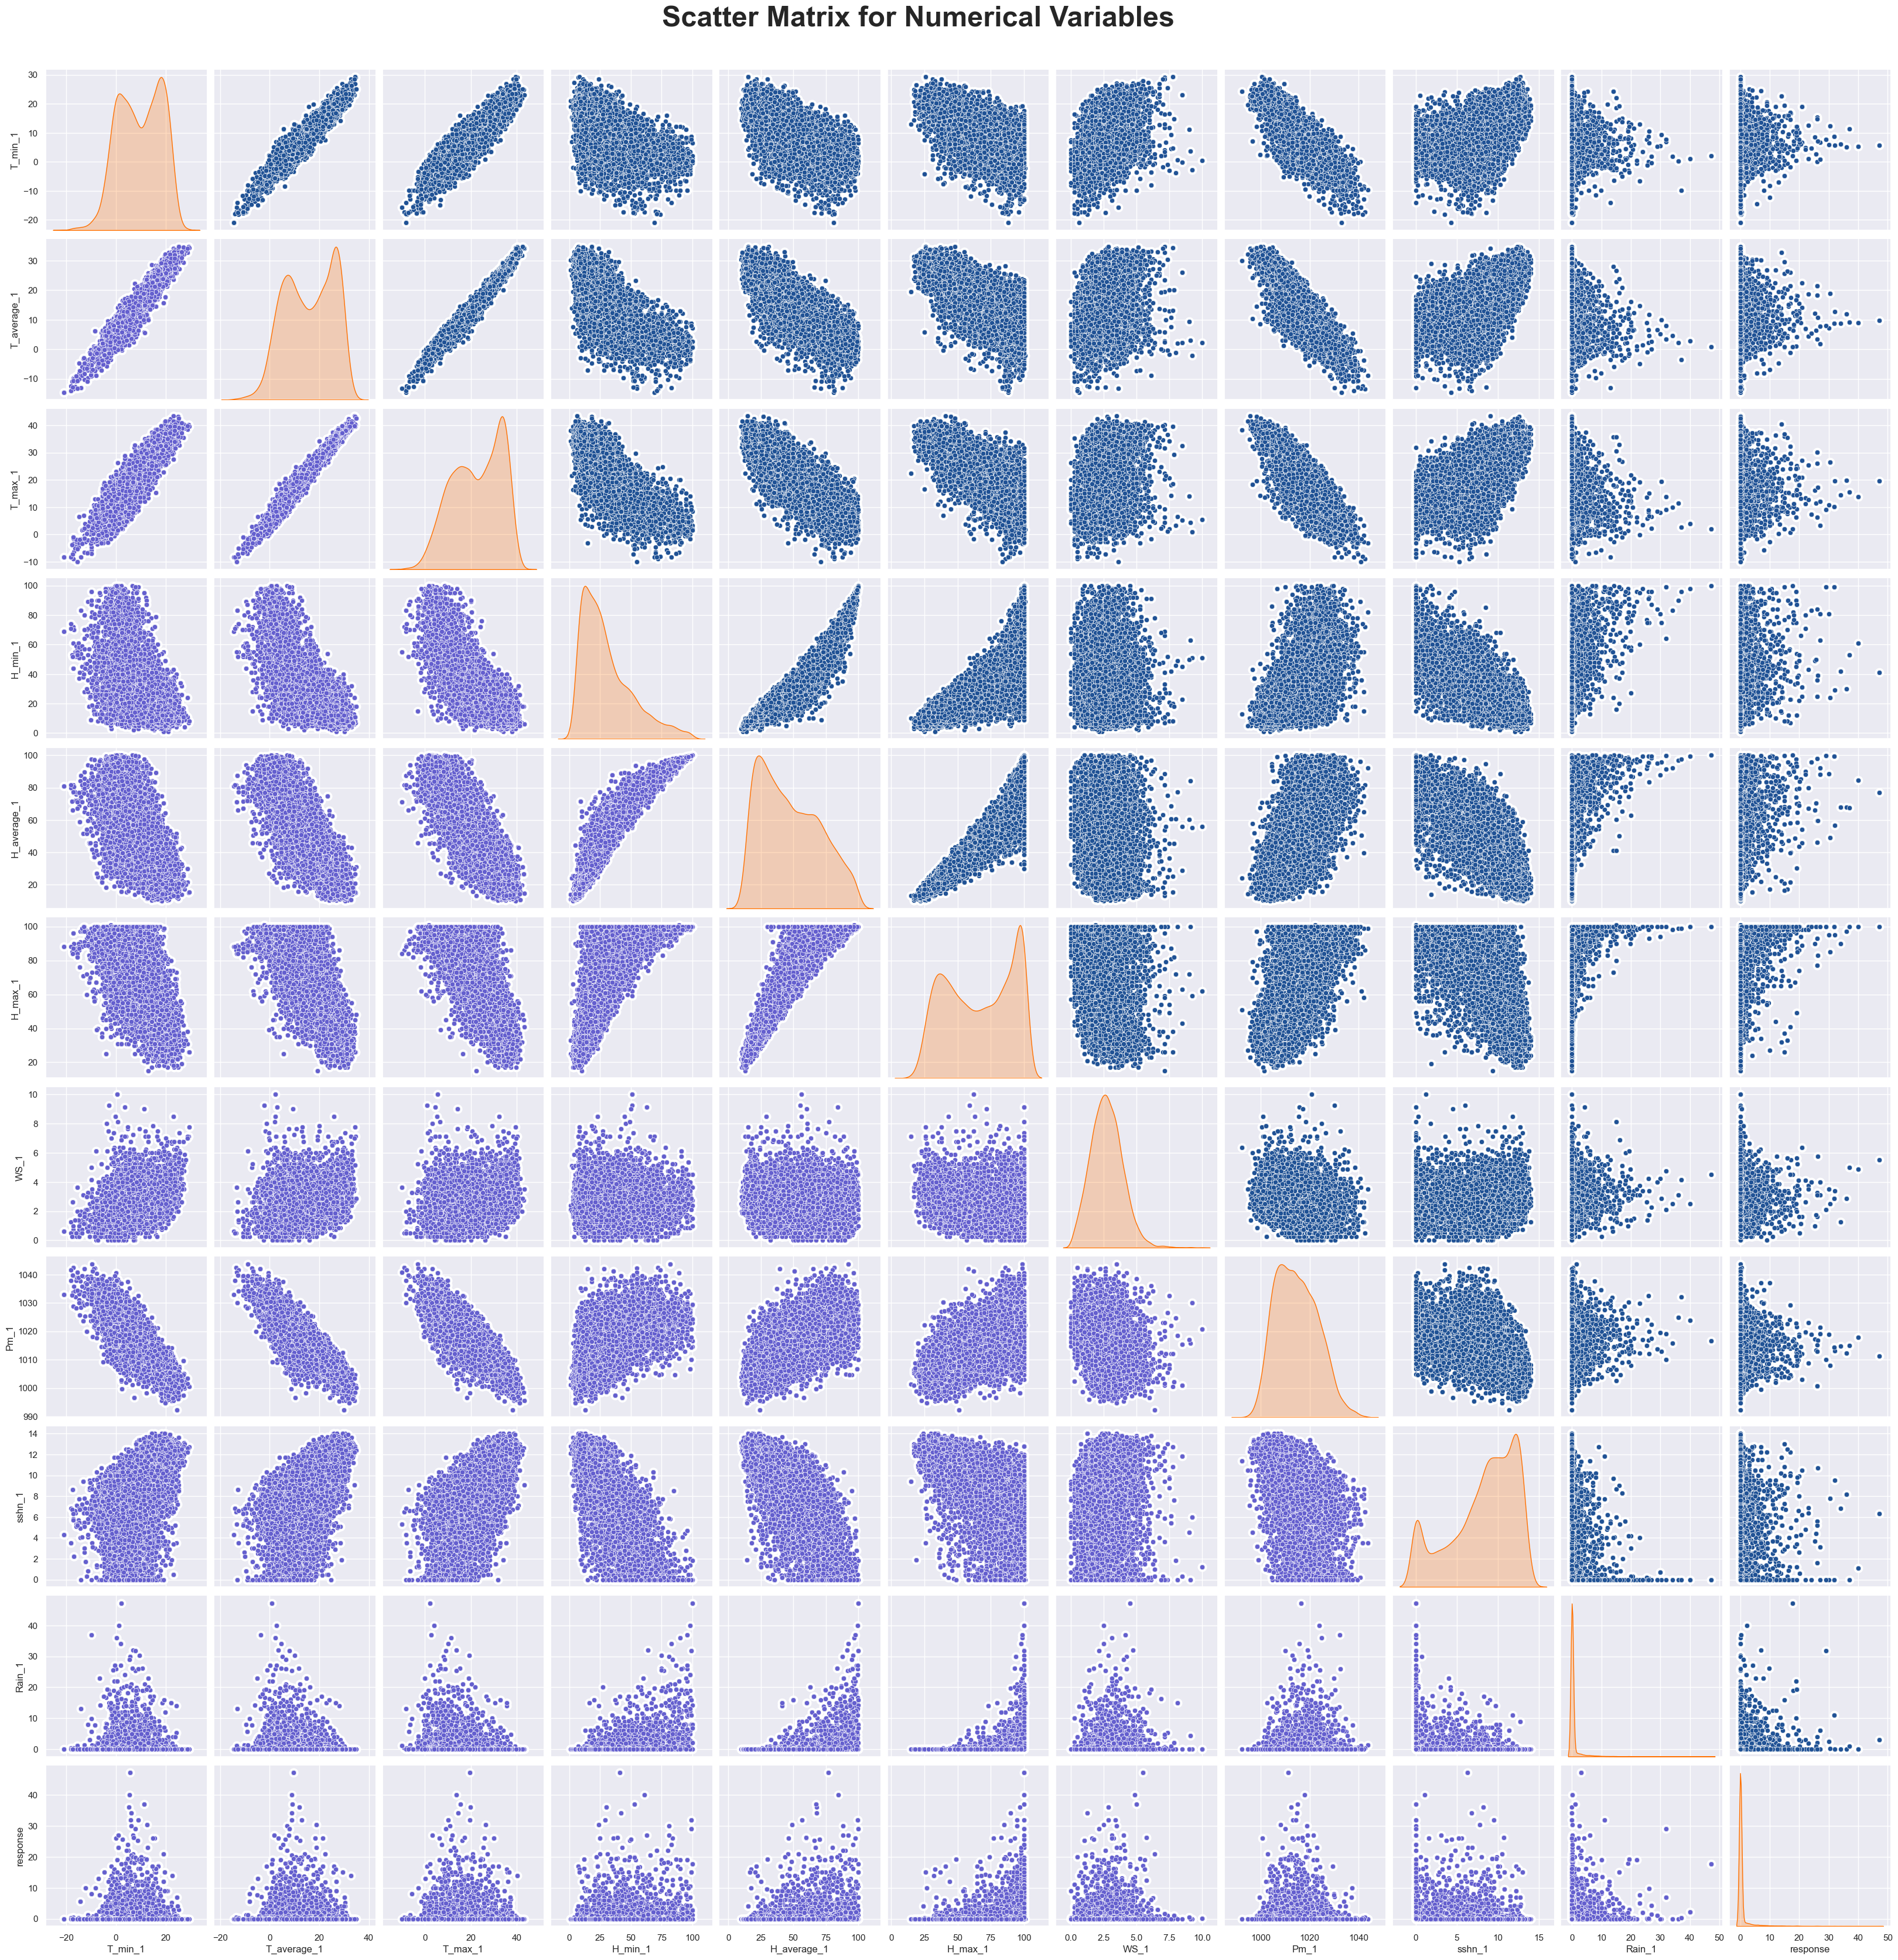

In [63]:
scatter_matrix_data_set = sns.pairplot( df , kind="scatter", height=3,
                                       diag_kws=dict(fill=True ,color = '#FF7000'), diag_kind='kde', plot_kws=dict(
                                        s=80, edgecolor="white", linewidth=2.5))

scatter_matrix_data_set.map_upper(sns.scatterplot, color='#205295')
scatter_matrix_data_set.map_lower(sns.scatterplot, color='#645FCE')


plt.title('Scatter Matrix for Numerical Variables ',
          fontsize=35, y=11.8, x=-5, fontweight='bold')


In [34]:
# FOR H-average
linear_regression_H_average = smf.ols(
    'response ~ H_average_1', Train_Normal_Data).fit()
linear_regression_H_average.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     291.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           8.20e-64
Time:                        15:23:56   Log-Likelihood:                -13174.
No. Observations:                5689   AIC:                         2.635e+04
Df Residuals:                    5687   BIC:                         2.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6117      0.033     18.814      0.000       0.548       0.675
H_average_1     0.5552      0.033     17.078      0.000       0.492       0.619
==============================================================================
Omnibus:                     6808.241   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           782418.116
Skew:                           6.435   Prob(JB):                         0.00
Kurtosis:                      58.992   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3-6-VIF

In [77]:
all_columns_VIF = "+".join(df.columns)
my_formula_VIF = "response~" + all_columns_VIF

y, X = dmatrices(my_formula, data = df, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
pd.DataFrame.from_dict(vif_coeff, orient= 'index',columns=['VIF'])


VIF
Intercept    69103.981535
H_average_1     53.363232
H_max_1         15.968330
H_min_1         18.895165
Pm_1             4.675728
Rain_1           1.318550
T_average_1    168.398508
T_max_1         78.782684
T_min_1         37.988921
WS_1             1.482056
sshn_1           3.408206

# 4- Split Data to Train and Test (70 - 30)

In [14]:
Train = df.iloc[:5689,:]
Test = df.iloc[5689:,:]
Test.shape

(2438, 11)

# 5- Normalization

## 5-1- Normalization (Train)

In [15]:
data_set_quantitaive = Train[Train.columns.difference(['response'])]

std_scale = preprocessing.StandardScaler().fit(data_set_quantitaive)
normal_data_set_array = std_scale.transform(data_set_quantitaive)
Train_Normal_Data = pd.DataFrame(normal_data_set_array , index = Train.index ,  columns =Train.columns.difference(['response']))

Train_Normal_Data = pd.concat([Train_Normal_Data , Train[['response']]] , axis = 1)
Train_Normal_Data.head()

H_average_1   H_max_1   H_min_1      Pm_1    Rain_1  T_average_1  \
Date                                                                           
2000-01-01    -0.021544  0.222778 -0.305060  0.744769 -0.243321    -0.796436   
2000-01-02    -0.021544  0.222778 -0.305060  0.744769 -0.243321    -0.796436   
2000-01-03    -0.256204  0.182543 -0.451124  0.454959 -0.243321    -0.715939   
2000-01-04    -0.561809 -0.581909 -0.645876  0.137102 -0.243321    -0.615317   
2000-01-05    -0.687325 -0.380738 -0.645876 -0.042860 -0.243321    -0.575069   

             T_max_1   T_min_1      WS_1    sshn_1  response  
Date                                                          
2000-01-01 -0.464478 -1.095521 -0.685835  0.129292       0.0  
2000-01-02 -0.464478 -1.095521 -0.685835  0.129292       0.0  
2000-01-03 -0.242385 -1.164877 -1.090598  0.129292       0.0  
2000-01-04 -0.205369 -0.910570 -0.483453  0.104033       0.0  
2000-01-05 -0.390447 -1.118639 -0.685835 -0.300111       0.0

## 5-2- Normalization (Test)

In [16]:
data_set_quantitaive = Test[Test.columns.difference(['response'])]

std_scale = preprocessing.StandardScaler().fit(data_set_quantitaive)
normal_data_set_array = std_scale.transform(data_set_quantitaive)
Test_Normal_Data = pd.DataFrame(normal_data_set_array , index = Test.index ,  columns =Test.columns.difference(['response']))

Test_Normal_Data = pd.concat([Test_Normal_Data , Test[['response']]] , axis = 1)
Test_Normal_Data.head()

H_average_1   H_max_1   H_min_1      Pm_1    Rain_1  T_average_1  \
Date                                                                           
2015-07-30    -1.358087 -1.163420 -1.248801 -1.338780 -0.220056     1.341613   
2015-07-31    -1.368955 -1.483233 -1.007390 -1.084478 -0.220056     1.331237   
2015-08-01    -1.173339 -1.363303 -0.814262 -1.073733 -0.220056     1.279357   
2015-08-02    -1.238544 -1.483233 -1.007390 -1.083284 -0.220056     1.258605   
2015-08-03    -1.401557 -1.563186 -1.103955 -1.036722 -0.220056     1.362365   

             T_max_1   T_min_1      WS_1    sshn_1  response  
Date                                                          
2015-07-30  1.289124  1.258624  0.452839  1.219547       0.0  
2015-07-31  1.279504  1.258624  0.570144  1.270929       0.0  
2015-08-01  1.183307  1.305803  1.190183  1.168165       0.0  
2015-08-02  1.202547  1.329392  0.452839  1.168165       0.0  
2015-08-03  1.260265  1.187855  1.726437  1.219547       0.0

In [17]:
X_Train = Train_Normal_Data[Train.columns.difference(['response'])]
Y_Train = Train_Normal_Data.response
X_Test = Test_Normal_Data[Test_Normal_Data.columns.difference(['response'])]
Y_Test = Test_Normal_Data.response